<a href="https://colab.research.google.com/github/adibayaseen/HKRCPI/blob/main/code/FromFile_SVM_nr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# script to installr rdkit https://gist.github.com/philopon/a75a33919d9ae41dbed5bc6a39f5ede2
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()



add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
rdkit is already installed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install biopython

     |████████████████████████████████| 2.3 MB 5.5 MB/s 


In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()#install_miniconda()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [ ]:
!conda install -c bioconda cd-hit

Solving environment: | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    cd-hit-4.8.1               |       h2e03b76_5         251 KB  bioconda
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.4 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-h2e03b76_5

The following packages will be UPDATED:

  ca-certificates                      2020.12.5-ha878542_0 --> 2021.10.8-ha878542_0
  certifi      

In [ ]:
!mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
xorg-libxrender          [] (00m:00s) Waiting...
libcblas                 [] (00m:00s) Waiting...
fontconfig               [] (00m:00s) Waiting...
libpng                   [] (00m:00s) Waiting...
openjpeg                 [] (00m:00s) Waiting...
python-dateutil          [] (00m:00s) Waiting...
xorg-xextproto           [] (00m:00s) Waiting...
xorg-libice              [] (00m:00s) Waiting...
greenlet                 [] (00m:00s) Waiting...
libxcb                   [] (00m:00s) Waiting...
sqlalchemy               [] (00m:00s)      2 MB /      2 MB (  1.09 MB/s)
openssl                  [] (00m:01s) Decompressing...
libstdcxx-ng             [] (00m:01s) Waiting...
kiwisolver               [] (00m:01s) Decompressing...
libgfortran-ng           [] (00m:01s) Waiting...
gettext                  [] (00m:01s) Waiting...
libwebp-base             [] (00m:01s) Waiting...
libtiff                  [] (00m:01s) Waiting...
libglib                  [] (0

In [ ]:
from rdkit import Chem

ImportError: ignored

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 10 20:01:32 2021
@author: fayya
"""
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
#rdkit.Avalon.pyAvalonTools.GetAvalonCountFP((object)mol[, (int)nBits=512[, (bool)isQuery=False[, (int)bitFlags=15761407]]])
#from rdkit.Avalon import pyAvalonTools as pat
def getFP(s,r = 3,nBits = 1024):        
    compound = Chem.MolFromSmiles(s.strip())
    fp = AllChem.GetMorganFingerprintAsBitVect(compound, r, nBits = nBits)
    #fp = pat.GetAvalonCountFP(compound,nBits=nBits)
    m = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, m)     
    return m
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

import random
import numpy as np
def NRKFold(E,pc,K = 5, shuffle=True):
    """
    Generate non-redundant K-folds so that no two folds contain proteins
    belonging to the same cluster and the number of examples are (approx)
    equal in all folds. Implements the greedy number partitioning method
    https://en.wikipedia.org/wiki/Greedy_number_partitioning
    >>> NRKFold(['p1','p2','p3','p4','p5','p6','p1'],{'p1':1,'p2':2,'p3':1,'p4':2,'p5':3,'p6':3},K=2, shuffle = False)
    Here we have 7 examples involving 6 proteins p1-p6 such that proteins
    p1,p3,p5 form one cluster whereas p2,p4,p6 form another cluster
    This results in division into two folds as [[0, 2, 6], [1, 3, 4, 5]]
    Note that examples 0,2,6 comprising fold-1 with proteins p1 and p2 are 
    from the first cluster whereas the remaining examples are from other clusters
    Parameters
    ----------
    E : TYPE List (length equal to number of examples)
        DESCRIPTION. Protein id of protein involved in each example
    pc : TYPE dictionary 
        DESCRIPTION. Cluster assignment of each protein
    K : TYPE, optional Integer
        DESCRIPTION. Number of folds The default is 5.
    shuffle: TYPE, Boolean
        cluster to fold assignments are different across different runs
    Returns
    -------
    F : TYPE list of lists
        DESCRIPTION. Indices of examples in E in each fold
    """
    e = [pc[str(x)] for x in E] #cluster indices of all proteins in the examples
    c2idx={} #indices of examples of each cluster in e
    for i,x in enumerate(e):
        try: 
            c2idx[x].append(i)
        except:
            c2idx[x]=[i]    
    ce = dict([(c,len(c2idx[c])) for c in c2idx]) #counts of examples of different clusters    
    cF = [0]*K; #counts of examples in each fold
    CF = [[] for _ in range(K)]; #clusters in each fold
    F = [[] for _ in range(K)];#indices of examples in each fold
    keys = list(ce.keys())
    if shuffle:
        random.shuffle(keys)
    for k in keys:
        v = ce[k]
        idx = np.argmin(cF)
        cF[idx]+=v
        CF[idx].append(k) #add cluster to fold
        F[idx].extend(c2idx[k])
    return F
import os
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
def processCDHIT(L,cthresh,ofile="out.cdhit"):#=0.8
    """   
    Generate CD-HIT clustering
    Runs CD-HIT and creates a temporary file which is not deleted automatically
    Parameters
    ----------
    L : TYPE Fasta file string OR List of protein sequences OR  SeqRecord
        DESCRIPTION.
    cthresh : TYPE, optional
        DESCRIPTION. Cutoff threshold The default is 0.8.
    ofile : TYPE, optional
        DESCRIPTION. The default is "out.cdhit".
    Returns
    -------
    cc : TYPE Dictionary with cluster id  as key and list of protein ids in each cluster
        DESCRIPTION. 
    pc: TYPE Dictionary with protein id string as key and cluster id as value
        DESCRIPTION. 
    """
    if type(L)==type(""):
        ifile = L
    else:
        if type(L[0]==type("")):
            L = [SeqRecord(Seq(p),id=str(i)) for i,p in enumerate(L)]
        ifile = ofile+"_temp.fasta"
        with open(ifile, "w") as output_handle:
            SeqIO.write(L, output_handle, "fasta") 
    
    cmd = "cd-hit -i "+ifile+" -d 0 -o "+ofile+" -c "+str(cthresh)+" -n 3  -G 1 -g 1 -b 20 -l 10 -s 0.0 -aL 0.0 -aS 0.0 -T 4 -M 32000"   
    os.system(cmd)
    with open(ofile+".clstr","r") as fh:
        clusters = fh.readlines()
    cc = {}
    for x in clusters:
        xs = x.split()
        if xs[0]=='>Cluster':
            ccid = int(xs[1])
            cc[ccid]=[]
        else:
            pid = xs[2][1:].split('...')[0]
            cc[ccid].append(pid)  
    pc = {}
    for k,v in cc.items():
        for vi in v:
            pc[vi]=k
    return cc,pc

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')


from Bio import SeqIO
from Bio.SeqIO import FastaIO
from itertools import product
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import math
def twomerFromSeq(s):
    k=2
    groups={'A':'1','V':'1','G':'1','I':'2','L':'2','F':'2','P':'2','Y':'3',
            'M':'3','T':'3','S':'3','H':'4','N':'4','Q':'4','W':'4',
            'R':'5','K':'5','D':'6','E':'6','C':'7'}
    crossproduct=[''.join (i) for i in product("1234567",repeat=k)]
    for i in range (0,len(crossproduct)): crossproduct[i]=int(crossproduct[i])
    ind=[]
    for i in range (0,len(crossproduct)): ind.append(i)
    combinations=dict(zip(crossproduct,ind))

    V=np.zeros(int((math.pow(7,k))))      #defines a vector of 343 length with zero entries
    try:
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                c+=groups[kmer[l]]
                V[combinations[int(c)]]+=1
    except:
        count={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0}
        for q in range(0,len(s)):
            if s[q]=='A' or s[q]=='V' or s[q]=='G':
                count['1']+=1
            if s[q]=='I' or s[q]=='L'or s[q]=='F' or s[q]=='P':
                count['2']+=1
            if s[q]=='Y' or s[q]=='M'or s[q]=='T' or s[q]=='S':
                count['3']+=1
            if s[q]=='H' or s[q]=='N'or s[q]=='Q' or s[q]=='W':
                count['4']+=1
            if s[q]=='R' or s[q]=='K':
                count['5']+=1
            if s[q]=='D' or s[q]=='E':
                count['6']+=1
            if s[q]=='C':
                count['7']+=1
        val=list(count.values()  )           #[ 0,0,0,0,0,0,0]
        key=list(count.keys()     )           #['1', '2', '3', '4', '5', '6', '7']
        m=0
        ind=0
        for t in range(0,len(val)):     #find maximum value from val
            if m<val[t]:
                m=val[t]
                ind=t
        m=key [ind]                     # m=group number of maximum occuring group alphabets in protein
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                if kmer[l] not in groups:
                    c+=m
                else:
                    c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1

    V=V/(len(s)-1)
    return np.array(V)
def threemerFromSeq(s):
    k=3
    groups={'A':'1','V':'1','G':'1','I':'2','L':'2','F':'2','P':'2','Y':'3',
            'M':'3','T':'3','S':'3','H':'4','N':'4','Q':'4','W':'4',
            'R':'5','K':'5','D':'6','E':'6','C':'7'}
    crossproduct=[''.join (i) for i in product("1234567",repeat=k)]
    for i in range (0,len(crossproduct)): crossproduct[i]=int(crossproduct[i])
    ind=[]
    for i in range (0,len(crossproduct)): ind.append(i)
    combinations=dict(zip(crossproduct,ind))

    V=np.zeros(int((math.pow(7,k))))      #defines a vector of 343 length with zero entries
    try:
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                c+=groups[kmer[l]]
                V[combinations[int(c)]]+=1
    except:
        count={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0}
        for q in range(0,len(s)):
            if s[q]=='A' or s[q]=='V' or s[q]=='G':
                count['1']+=1
            if s[q]=='I' or s[q]=='L'or s[q]=='F' or s[q]=='P':
                count['2']+=1
            if s[q]=='Y' or s[q]=='M'or s[q]=='T' or s[q]=='S':
                count['3']+=1
            if s[q]=='H' or s[q]=='N'or s[q]=='Q' or s[q]=='W':
                count['4']+=1
            if s[q]=='R' or s[q]=='K':
                count['5']+=1
            if s[q]=='D' or s[q]=='E':
                count['6']+=1
            if s[q]=='C':
                count['7']+=1
        val=list(count.values())              #[ 0,0,0,0,0,0,0]
        key=list(count.keys() )              #['1', '2', '3', '4', '5', '6', '7']
        m=0
        ind=0
        for t in range(0,len(val)):     #find maximum value from val
            if m<val[t]:
                m=val[t]
                ind=t
        m=key [ind]                     # m=group number of maximum occuring group alphabets in protein
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                if kmer[l] not in groups:
                    c+=m
                else:
                    c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1

    V=V/(len(s)-1)
    return np.array(V)
def prot_feats_seq(seq):
    aa=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    f=[]
    X = ProteinAnalysis(str(seq))
    X.molecular_weight() #throws an error if 'X' in sequence. we skip such sequences
    p=X.get_amino_acids_percent()
    dp=[]
    for a in aa:
        dp.append(p[a])
    dp=np.array(dp)
    dp=normalize(np.atleast_2d(dp), norm='l2', copy=True, axis=1, return_norm=False)
    f.extend(dp[0])
    tm=np.array(twomerFromSeq(str(seq)))
    tm=normalize(np.atleast_2d(tm), norm='l2', copy=True, axis=1,return_norm=False)
    f.extend(tm[0])
    thm=np.array(threemerFromSeq(str(seq)))
    thm=normalize(np.atleast_2d(thm), norm='l2', copy=True, axis=1,return_norm=False)
    f.extend(thm[0])
    return np.array(f)
def DataWrite(Cseq,Pseq,Y, filename):
  path='/content/drive/MyDrive/CPI_Data/'
  filename=open(path+filename+'.txt','w', encoding="utf-8")
  for data in range(len(Cseq)):
    filename.write((Cseq[data]+' '+Pseq[data]+' '+str(Y[data])+"\n"))
def Features_Predictor():
  path='/content/drive/MyDrive/CPI_Data/'
  with open(path+'2p2i_TargetvsNonTargetchain_human.txt') as f:#New_Unique_data.txt') as f:#
    #with open('./data.txt') as f:#../../celegans/original
    D = f.readlines()
  C=[];P=[];Y=[];Cseq=[];Pseq=[]
  Ids=[];Ligands=[];Complexs=[];Chains=[];
  for d in tqdm(D):
      Id,Ligand,Complex,Chain,c,p,y = d.split()
      #id,c,p,y = d.split()
      try:
          xc = getFP(c)
          xp = prot_feats_seq(p)
      except Exception as e:
          print(e)
          continue
      Cseq.append(c)
      Pseq.append(p)
      C.append(xc)
      P.append(xp)
      Y.append(2*float(y)-1)
      ####
      Ids.append(Id);Ligands.append(Ligand);Complexs.append(Complex);Chains.append(Chain);
  Y = np.array(Y);
  C = np.array(C);
  P = np.array(P);
  return P,C,Y
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics.pairwise import rbf_kernel as kernel #sigmoid_kernel,rbf_kernel,linear_kernel
from sklearn.model_selection import StratifiedKFold, KFold
import random
if __name__=='__main__':
    NegtiveRatio='7'
    path='/content/drive/MyDrive/CPI_Data/'
    #with open(path+'Orignal_CPI_data.txt') as f:
    #with open(path+'Orignal_CPI_data.txt') as f:#6725
    with open(path+'pos2negtiveRatio'+NegtiveRatio+'_Alpha_threshold_Random.txt') as f:
    #with open('./data.txt') as f:#../../celegans/original
        D = f.readlines()
    C=[];P=[];Y=[];Cseq=[];Pseq=[]
    for d in tqdm(D):
        c,p,y = d.split()
        #id,c,p,y = d.split()
        try:
            xc = getFP(c)
            xp = prot_feats_seq(p)
        except Exception as e:
            print(e)
            continue
        Cseq.append(c)
        Pseq.append(p)
        C.append(xc)
        P.append(xp)
        #Y.append(2*float(y)-1)#Orignal
        Y.append(float(y))#when read from file which have already negative examples as -1
    Y = np.array(Y)
    C = np.array(C);
    P = np.array(P);
    print("Total length=",len(P),"Total positive",len(Y[Y==1]),"Total Negative",len(Y[Y!=1]))
    
#%% Generating negative examples  
    regenerate =  False#
    if regenerate:
        Pset = list(set(Pseq)) #set of protein sequences
        pidx = list(range(len(Pset))) 
        Pdict = dict(zip(Pset, pidx)) #seq->index
        Cset = list(set(Cseq)) #set of compound sequences
        cidx = list(range(len(Cset)))#
        Cdict = dict(zip(Cset, cidx)) #str->index
        Epairs = np.array([(Pdict[p],Cdict[c]) for (p,c) in zip(Pseq,Cseq)]) #dict of pairs
        pos,negs = Epairs[Y==1,:],Epairs[Y!=1,:] 
        #if the negs are to be sampled such that the both the protein and compound occur in the positive set as well
        #pidx,cidx = list(set(pos[:,0])),list(set(pos[:,1])) 
        #pos, negs = list(map(tuple,pos.tolist())),list(map(tuple,negs.tolist())) #
        #below - remove 100% redundant positive and negative examples -- original redundant examples are not removed otherwise
        pos, negs = list(set(map(tuple,pos.tolist()))),list(set(map(tuple,negs.tolist())))
        Lnegs = len(negs)
        """
        NegtiveRatio=7
        NN =NegtiveRatio*len(pos)#len(negs) #
        negs = [] #comment to use the set of original negatives
        ######## Dissimilarity Criteria for negtive examples
        Pos_PFeatures = np.array([prot_feats_seq(Pset[s[0]]) for s in pos])
        Pos_Pseq=np.array([s[0] for s in pos])
        Pos_CFeatures = np.array([getFP(Cset[s[1]]) for s in pos])
        Pos_Cseq=np.array([s[1] for s in pos])
        #######
        Pos_Pscaler = StandardScaler().fit(Pos_PFeatures )
        Pos_Cscaler = StandardScaler().fit(Pos_CFeatures)
        Pos_Ptr,Pos_Ctr = Pos_Pscaler.transform(Pos_PFeatures), Pos_Cscaler.transform(Pos_CFeatures)
        #####
        Kpp = kernel(Pos_Ptr)
        Kcp = kernel(Pos_Ctr)
        Kpp_dict=dict(zip(Pos_Pseq,Kpp))
        Kcp_dict=dict(zip(Pos_Cseq,Kcp))
        ######
        Alpha_threshold='Random'#0.03
        while len(negs)<NN:
          possible = (random.choice(pidx),random.choice(cidx))#(pidx[np.random.randint(0,len(ppos))],cidx[np.random.randint(0,len(cpos))])
          index_P=np.argmax(Kpp_dict[possible[0]])
          new_Spp=np.delete(Kpp[index_P],index_P)
          index_C=np.argmax(Kcp_dict[possible[1]])
          new_Scp=np.delete(Kcp[index_C],index_C)
          Alpha=np.max(new_Spp)*np.max(new_Scp)
          if possible not in pos and possible not in negs:# and Alpha<Alpha_threshold:
              negs.append(possible)      
        """  
        print('Added Negatives',len(negs)-Lnegs)
        iPdict = {v: k for k, v in Pdict.items()}
        iCdict = {v: k for k, v in Cdict.items()}
        
        C=[];P=[];Y=[];Cseq=[];Pseq=[]
        for i,(p,c) in tqdm(enumerate(pos+negs)):
            p = iPdict[p]
            c = iCdict[c]
            try:
                xc = getFP(c)
                xp = prot_feats_seq(p)
            except Exception as e:
                print(e)
                continue
            Cseq.append(c)
            Pseq.append(p)
            C.append(xc)
            P.append(xp)
            Y.append(2*(i<len(pos))-1)
        
#%%
    Y = np.array(Y)
    C = np.array(C);
    P = np.array(P);
    ####
    Alpha_threshold='Random'
    #filename="pos2negtiveRatio"+str (NegtiveRatio)+"_Alpha_threshold_"+str (Alpha_threshold)
    #DataWrite(Cseq,Pseq,Y, filename)
    import itertools
    Pset = list(set(Pseq)) #set of protein sequences
    pidx = list(range(len(Pset))) 
    Pdict = dict(zip(Pset, pidx)) #seq->index
    Cset = list(set(Cseq)) #set of compound sequences
    cidx = list(range(len(Cset)))#
    Cdict = dict(zip(Cset, cidx)) #str->index
    Epairs = np.array([(Pdict[p],Cdict[c]) for (p,c) in zip(Pseq,Cseq)]) #dict of pairs
#%% 
    cc,pc = processCDHIT(Pset,cthresh = 0.9) 
    
    E = list(Epairs[:,0]) #protein id of examples
    F = NRKFold(E,pc,K=5,shuffle=True)   
    
#%%        
    gp = gc = None
    skf = KFold(n_splits=5,shuffle=True)
    skf = StratifiedKFold(n_splits=5,shuffle=True)        
    F=[list(test_index) for (train_index, test_index) in skf.split(P, Y)] 
    F = NRKFold(E,pc,K=5,shuffle=True) 
    Z = []; Yo = []; A = [];Yp=[]
    AUC_ROC_final=[];Precision_final=[];Recall_final=[];Avg_P_final=[];
    #for train_index, test_index in tqdm(skf.split(P, Y)):#for 5-folds
    for f in tqdm(range(len(F))):
        train_index = list(itertools.chain.from_iterable(F[:f]+F[f+1:]))
        test_index = F[f]
        #show number of proteins shared between train and test
        print(len(set([E[x] for x in train_index]).intersection([E[x] for x in test_index])))        
        y_train, y_test = Y[train_index], Y[test_index] 
        Ptr,Ctr = P[train_index,:],C[train_index,:]
        Pscaler = StandardScaler().fit(Ptr)
        Cscaler = StandardScaler().fit(Ctr)
        Ptr,Ctr = Pscaler.transform(Ptr), Cscaler.transform(Ctr)
        
        Kp = kernel(Ptr)
        Kc = kernel(Ctr)
        #Ktr = Kp*Kc#for checking only
        Ktr = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)Kp*Kc#
        
        clf = SVC(C = 1.0, kernel = 'precomputed',class_weight='balanced')
        clf.fit(Ktr,y_train)
        
        Ptt,Ctt = P[test_index,:],C[test_index,:]
        Ptt,Ctt = Pscaler.transform(Ptt), Cscaler.transform(Ctt)
        
        Kp = kernel(Ptt,Ptr)
        Kc = kernel(Ctt,Ctr)
        #Ktt= Kp*Kc#for checking only
        Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)Kp*Kc#
        z = clf.decision_function(Ktt)
        yp=clf.predict(Ktt)
        auc = roc_auc_score(y_test, z)
        precision = precision_score(y_test, yp)
        recall = recall_score(y_test, yp)
        average_P_score=average_precision_score(y_test, z)
        print("fold Auc:",auc,"precision=",precision,"recall=",recall,"average_P_score=",average_P_score )
        AUC_ROC_final.append(auc);Precision_final.append(precision );Recall_final.append(recall);Avg_P_final.append(average_P_score);Z.extend(list(z));Yo.extend(list(y_test))#;Yp.extend(list(yp))

    
    fpr, tpr, thresholds = roc_curve(Yo, Z)  
    auc = roc_auc_score(Yo, Z)
    #####
    plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
    print("Final average over 5folds",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Precision_final).round(4),'±',np.std( Precision_final).round(4),np.average(Recall_final).round(4),'±',np.std( Recall_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))
    print("Alpha_threshold=",Alpha_threshold,"NegtiveRatio=",NegtiveRatio)#,"AUC=",auc,"Percision=",precision,"Recall=",recall,"average_precision_score",average_P_score)
    1/0
    #####2p2iTest
    P_test,C_test,Y_test=Features_Predictor()
    P_test,C_test = Pscaler.transform(P_test), Cscaler.transform(C_test)
    
    Kp = kernel(P_test,Ptr)
    Kc = kernel(C_test,Ctr)
    Ktt_test = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    z_test = clf.decision_function(Ktt_test)
    auc_test = roc_auc_score(Y_test, z_test)
    yp_test=clf.predict(Ktt_test)
    precision_test = precision_score(Y_test, yp_test)
    recall_test = recall_score(Y_test, yp_test)
    average_precision_score_test=average_precision_score(Y_test, z_test)
    print("AUC_test=",auc_test,"Percision_test=",precision_test,"Recall_test=",recall_test,"average_precision_score_test",average_precision_score_test)
    1/0
#%% Training on all 
    
    # Ptr,Ctr = P,C
    # y_train = Y
    # Pscaler = StandardScaler().fit(Ptr)
    # Cscaler = StandardScaler().fit(Ctr)
    # Ptr,Ctr = Pscaler.transform(Ptr), Cscaler.transform(Ctr)
    
    # Kp = kernel(Ptr)
    # Kc = kernel(Ctr)
    # Ktr = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    # clf = SVC(C = 100.0, kernel = 'precomputed',class_weight='balanced')
    # clf.fit(Ktr,y_train)
    
#%% Testing 
    # Lmj_eIF4E4 (Binding residues in yellow) (Binding domain underlined)
    s = 'MSTPLDVRAAEYSPSFAVTMKKTVAAAPPKSPAPAKSKISVTRTGVNTTYPMPPPMPEKNYAPFFAEGCQTIAASKASMPPVQPASPLPPMHSAPPTASVVSNSIPPSSPATAPGERSPAVAARSVPTRFSPATVPRHHMNPNATEFMPGRRNGPDGGLEALPTSTADMELAKTPAGAAAAAVHAPSLPGAVRRSLQNSPIIQPSRLSVKSASEIEAISKNSALNAAAAAYVPQRTLARVVLTQPSPLALAPSEDPAKNNIEMMLDDLWCLFYLPTTLGENIKEEDYNPTLVFRVDSILTFWRVVNNIAAPSELQLSTLYLFRDGIDPKWEDPANRDGGIVKVKATAAQVDEAWELLLCRTIGDSWSPSVRETVNGVVLKVRERAYWLELWVTKNSSALQKDLAELWHPILGASFATTYLTHAMMQERSHAAAALAAEKQKKNRRRY'
    #s = 'MNPNATEFMPGRRNGPDGGLEALPTSTADMELAKTPAGAAAAAVHAPSLPGAVRRSLQNSPIIQPSRLSVKSASEIEAISKNSALN'
    # Lmj_PABP1
    s = 'MAAAVQEAAAPVAHQPQMDKPMQIASIYVGDLDATINEPQLVELFKPFGTILNVRVCRDIITQRSLGYGYVNFDNHDSAEKAIESMNFKRVGDKCVRLMWQQRDPALRYSGNGNVFVKNLEKDVDSKSLHDIFTKFGSILSCKVMQDEEGKSRGYGFVHFKDETSAKDAIVKMNGAADHASEDKKALYVANFIRRNARLAALVANFTNVYIKQVLPTVNKDVIEKFFAKFGGITSAAACKDKSGRVFAFCNFEKHDDAVKAVEAMHDHHIDGITAPGEKLYVQRAQPRSERLIALRQKYMQHQALGNNLYVRNFDPEFTGADLLELFKEYGEVKSCRVMVSESGVSRGFGFVSFSNADEANAALREMNGRMLNGKPLIVNIAQRRDQRYTMLRLQFQQRLQMMMRQMHQPMPFVGSQGRPMRGRGGRQQLGGRAQGHPMPMPSPQQPQAPAQPQGFATPSAVGFVQATPKHSPGDVPETPPLPPITPQELESMSPQEQRAALGDRLFLKVYEIAPELAPKITGMFLEMKPKEAYELLNDQKRLEERVTEALCVLKAHQTA'
    #s = 'LPPITPQELESMSPQEQRAALGDRLFLKVYEIAPELAPKITGMFLEMKPKEAYELLNDQKRLEERVTEALCVLKAHQTA'
    #s = 'SWISSCHEESE'#'MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK'
    #s = 'MFRQEQPLAEGSFAPMGSLQPDAGNASWNGTEAPGGGARATPYSLQVTLTLVCLAGLLMLLTVFGNVLVIIAVFTSRALKAPQNLFLVSLASADILVATLVIPFSLANEVMGYWYFGKAWCEIYLALDVLFCTSSIVHLCAISLDRYWSITQAIEYNLKRTPRRIKAIIITVWVISAVISFPPLISIEKKGGGGGPQPAEPRCEINDQKWYVISSCIGSFFAPCLIMILVYVRIYQIAKRRTRVPPSRRGPDAVAAPPGGTERRPNGLGPERSAGPGGAEAEPLPTQLNGAPGEPAPAGPRDTDALDLEESSSSDHAERPPGPRRPERGPRGKGKARASQVKPGDSLPRRGPGATGIGTPAAGPGEERVGAAKASRWRGRQNREKRFTFVLAVVIGVFVVCWFPFFFTYTLTAVGCSVPRTLFKFFFWFGYCNSSLNPVIYTIFNHDFRRAFKKILCRGDRKRIV'
    #s = 'MSLPNSSCLLEDKMCEGNKTTMASPQLMPLVVVLSTICLVTVGLNLLVLYAVRSERKLHTVGNLYIVSLSVADLIVGAVVMPMNILYLLMSKWSLGRPLCLFWLSMDYVASTASIFSVFILCIDRYRSVQQPLRYLKYRTKTRASATILGAWFLSFLWVIPILGWNHFMQQTSVRREDKCETDFYDVTWFKVMTAIINFYLPTLLMLWFYAKIYKAVRQHCQHRELINRSLPSFSEIKLRPENPKGDAKKPGKESPWEVLKRKPKDAGGGSVLKSPSQTPKEMKSPVVFSQEDDREVDKLYCFPLDIVHMQAAAEGSSRDYVAVNRSHGQLKTDEQGLNTHGASEISEDQMLGDSQSFSRTDSDTTTETAPGKGKLRSGSNTGLDYIKFTWKRLRSHSRQYVSGLHMNRERKAAKQLGFIMAAFILCWIPYFIFFMVIAFCKNCCNEHLHMFTIWLGYINSTLNPLIYPLCNENFKKTFKRILHIRS'
    Cuseq = np.unique(Cseq)
    """
    pp = 'h1'#[]
    with open('../../../../'+pp+"_inactive.txt") as f:
        Cuseq = np.array(f.readlines())
    """
    xp = prot_feats_seq(s)
    Ptt = np.array([xp]*len(Cuseq))
    """
    Cseq = np.array(Cseq)
    Pseq = np.array(Pseq)
    Cuseq=Cseq[test_index]
    Puseq=Pseq[test_index]        
    Ptt = np.array([prot_feats_seq(s) for s in Puseq])
    """
    Ctt = np.array([getFP(c) for c in Cuseq])    
    
    Ptt,Ctt = Pscaler.transform(Ptt), Cscaler.transform(Ctt)
        
    Kp = kernel(Ptt,Ptr)
    Kc = kernel(Ctt,Ctr)
    Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    z = clf.decision_function(Ktt)
    """
    yy = Y[test_index]
    fpr, tpr, thresholds = roc_curve(yy, z)  
    auc = roc_auc_score(yy, z)
    plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
    """

    idx = np.argsort(-z)    
    print(Cuseq[idx[:3]])
    M = [Chem.MolFromSmiles(Cuseq[i]) for i in idx[:10]]
    # for i in idx[:10]:
    #     m = Chem.MolFromSmiles(Cuseq[i])
    #     SVG(moltosvg(m))
#%%
    zpos=list(zpos);zneg=list(zneg)
    yy=[1]*len(zpos)+[-1]*len(zneg)
    zz = zpos+zneg
    fpr, tpr, thresholds = roc_curve(yy, zz)  
    auc = roc_auc_score(yy, zz)
    precision = precision_score(yy, zz)
    recall = recall_score(yy, zz)
    average_precision_score=average_precision_score(yy, zz)
    plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
    print("AUC=",auc,"Percision=",precision,"Recall=",recall,"average_precision_score",average_precision_score)

ModuleNotFoundError: ignored

In [ ]:
 len(list (set (negs)))+ len(list (set (pos)))

5994

In [ ]:
fpr, tpr, thresholds = roc_curve(Yo, Z)  
1/0
auc = roc_auc_score(Yo, Z)
#####
plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
print("Final average over 5folds",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Precision_final).round(4),'±',np.std( Precision_final).round(4),np.average(Recall_final).round(4),'±',np.std( Recall_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))
print("Alpha_threshold=",Alpha_threshold,"NegtiveRatio=",NegtiveRatio)#,"AUC=",auc,"Percision=",precision,"Recall=",recall,"average_precision_score",average_P_score)

ValueError: ignored

In [ ]:
len(list (set (negs))+list (set (pos)))

5994

(array([7899.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2633.]),
 array([-3. , -2.6, -2.2, -1.8, -1.4, -1. , -0.6, -0.2,  0.2,  0.6,  1. ]),
 <a list of 10 Patch objects>)

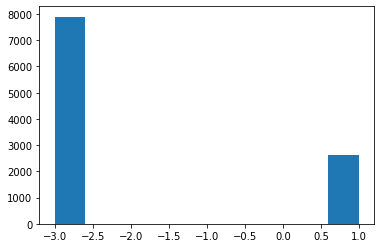

In [ ]:
plt.hist(Yo)

In [ ]:
0.681 ± 0.0361 0.7219 ± 0.0381 0.3571 ± 0.0472 0.4986 ± 0.0201#Ratio7


In [ ]:
"""
Compound Clustering
"""
def get_fps(s,r = 3,nBits = 1024):        
    compound = Chem.MolFromSmiles(str (s).strip())
    fp = AllChem.GetMorganFingerprintAsBitVect(compound, r, nBits = nBits)
    #fp = pat.GetAvalonCountFP(compound,nBits=nBits)
    m = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, m)     
    return m
def calculate_sims(fps1,fps2,simtype='tanimoto'):
    sim_mat = np.zeros((len(fps1),len(fps2))) #,dtype=np.float32)
    for i in range(len(fps1)):
        fp_i = fps1[i]
        if simtype == 'tanimoto':
            sims = DataStructs.BulkTanimotoSimilarity(fp_i,fps2)
        elif simtype == 'dice':
            sims = DataStructs.BulkDiceSimilarity(fp_i,fps2)
        sim_mat[i,:] = sims
    return sim_mat
def compound_clustering(ligand_list, mol_list):
    print ('start compound clustering...')
    fps = get_fps(mol_list)
    sim_mat = calculate_sims(fps, fps)
    1/0
    #np.save('../preprocessing/'+MEASURE+'_compound_sim_mat.npy', sim_mat)
    print ('compound sim mat', sim_mat.shape)
    C_dist = pdist(fps, 'jaccard')
    C_link = single(C_dist)
    for thre in [0.3, 0.4, 0.5, 0.6]:
        C_clusters = fcluster(C_link, thre, 'distance')
        len_list = []
        for i in range(1,max(C_clusters)+1):
            len_list.append(C_clusters.tolist().count(i))
        print ('thre', thre, 'total num of compounds', len(ligand_list), 'num of clusters', max(C_clusters), 'max length', max(len_list))
        C_cluster_dict = {ligand_list[i]:C_clusters[i] for i in range(len(ligand_list))}
        with open('../preprocessing/'+MEASURE+'_compound_cluster_dict_'+str(thre),'wb') as f:
            pickle.dump(C_cluster_dict, f, protocol=0)

In [ ]:
smiles = 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O' 
m = Chem.MolFromSmiles(smiles)
ligand_list=['CN(C)CCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl','C/C=C/C(=O)O','C[C@@H]1C[C@H]2CN1CCN3C(=O)C4=C(N3)C(=CC=C4)C5=NC6=C(C=CC=C6O2)NC5=O']
mol_list = np.array([Chem.MolFromSmiles(str (s).strip()) for s in ligand_list])
#compound_clustering(ligand_list, mol_list)
compound_clustering(ligand_list, mol_list)

start compound clustering...


RDKit ERROR: [15:41:17] SMILES Parse Error: syntax error while parsing: [<rdkit.Chem.rdchem.Mol
RDKit ERROR: [15:41:17] SMILES Parse Error: Failed parsing SMILES '[<rdkit.Chem.rdchem.Mol' for input: '[<rdkit.Chem.rdchem.Mol'


ArgumentError: ignored

In [ ]:
index_P=np.argmax(Kpp_dict[possible[0]])
new_Spp=np.delete(Kpp[index_P],index_P)
index_C=np.argmax(Kcp_dict[possible[1]])
new_Scp=np.delete(Kcp[index_C],index_C)
Alpha=np.max(new_Spp)*np.max(new_Scp)

In [ ]:
Alpha

0.4170372337582398

In [ ]:
index_P=np.argmax(Kpp_dict[possible[0]],axis=0)

In [ ]:
index_P

414

In [ ]:
Pseq[414]

'MLGQSIRRFTTSVVRRSHYEEGPGKNLPFSVENKWSLLAKMCLYFGSAFATPFLVVRHQLLKT'

In [ ]:
possible[0]

1971

In [ ]:
Pseq[possible[0]]

'MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLGLVENGVILFVVGCRMRQTVVTTWVLHLALSDLLASASLPFFTYFLAVGHSWELGTTFCKLHSSIFFLNMFASGFLLSAISLDRCLQVVRPVWAQNHRTVAAAHKVCLVLWALAVLNTVPYFVFRDTISRLDGRIMCYYNVLLLNPGPDRDATCNSRQVALAVSKFLLAFLVPLAIIASSHAAVSLRLQHRGRRRPGRFVRLVAAVVAAFALCWGPYHVFSLLEARAHANPGLRPLVWRGLPFVTSLAFFNSVANPVLYVLTCPDMLRKLRRSLRTVLESVLVDDSELGGAGSSRRRRTSSTARSASPLALCSRPEEPRGPARLLGWLLGSCAASPQTGPLNRALSSTSS'

In [ ]:
new_Spp=np.delete(Kpp[index_P],index_P)

In [ ]:
Kpp.shape

(2633, 2633)

In [ ]:
new_Spp.shape

(2632,)

In [ ]:
np.max(new_Spp)

0.4170372337582398

In [ ]:
Kpp[414][414]

1.0

In [ ]:
index_C=np.argmax(Kcp_dict[possible[1]])

In [ ]:
index_C

622

In [ ]:
Cseq[possible[1]]

'COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)OCO5)OC'

In [ ]:
Cseq[622]

'CC[C@@H](CO)NC(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=CC(=C34)C2=C1)C'

In [ ]:
Kcp[622][622]

1.0

In [ ]:
Kpp[1553]

array([0.10698497, 0.09446275, 0.12335915, ..., 0.11696652, 0.19929922,
       0.14677718])

In [ ]:
Kpp[1553][1553]

1.0

In [ ]:
new_Spp=np.delete(Kpp[index],index)

In [ ]:
np.max(new_Spp)

0.9999999999999992

In [ ]:
np.argmax(new_Spp)

53

In [ ]:
Pseq[53]

'MPKKKPTPIQLNPAPDGSAVNGTSSAETNLEALQKKLEELELDEQQRKRLEAFLTQKQKVGELKDDDFEKISELGAGNGGVVFKVSHKPSGLVMARKLIHLEIKPAIRNQIIRELQVLHECNSPYIVGFYGAFYSDGEISICMEHMDGGSLDQVLKKAGRIPEQILGKVSIAVIKGLTYLREKHKIMHRDVKPSNILVNSRGEIKLCDFGVSGQLIDSMANSFVGTRSYMSPERLQGTHYSVQSDIWSMGLSLVEMAVGRYPIPPPDAKELELMFGCQVEGDAAETPPRPRTPGRPLSSYGMDSRPPMAIFELLDYIVNEPPPKLPSGVFSLEFQDFVNKCLIKNPAERADLKQLMVHAFIKRSDAEEVDFAGWLCSTIGLNQPSTPTHAAGV'

In [ ]:
Pseq[possible[0]]

'MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLGLVENGVILFVVGCRMRQTVVTTWVLHLALSDLLASASLPFFTYFLAVGHSWELGTTFCKLHSSIFFLNMFASGFLLSAISLDRCLQVVRPVWAQNHRTVAAAHKVCLVLWALAVLNTVPYFVFRDTISRLDGRIMCYYNVLLLNPGPDRDATCNSRQVALAVSKFLLAFLVPLAIIASSHAAVSLRLQHRGRRRPGRFVRLVAAVVAAFALCWGPYHVFSLLEARAHANPGLRPLVWRGLPFVTSLAFFNSVANPVLYVLTCPDMLRKLRRSLRTVLESVLVDDSELGGAGSSRRRRTSSTARSASPLALCSRPEEPRGPARLLGWLLGSCAASPQTGPLNRALSSTSS'

In [ ]:
Pseq[Pos_Pseq[1553]]

'MQWAVGRRWAWAALLLAVAAVLTQVVWLWLGTQSFVFQREEIAQLARQYAGLDHELAFSRLIVELRRLHPGHVLPDEELQWVFVNAGGWMGAMCLLHASLSEYVLLFGTALGSRGHSGRYWAEISDTIISGTFHQWREGTTKSEVFYPGETVVHGPGEATAVEWGPNTWMVEYGRGVIPSTLAFALADTVFSTQDFLTLFYTLRSYARGLRLELTTYLFGQDP'

In [ ]:
Kpp_dict.keys()

dict_keys([784, 828, 1087, 381, 276, 1472, 495, 1961, 1225, 1539, 560, 88, 854, 75, 1049, 46, 1015, 1541, 165, 1269, 1727, 654, 230, 1835, 1405, 1478, 1429, 1155, 57, 1750, 203, 309, 573, 1163, 1770, 910, 853, 301, 1424, 308, 314, 1591, 677, 773, 1287, 522, 1455, 1990, 250, 1969, 1627, 585, 35, 1432, 994, 1585, 1936, 709, 943, 1332, 120, 1016, 1330, 1211, 1886, 1105, 1398, 468, 1977, 526, 1277, 11, 1726, 1816, 1227, 1162, 1776, 1612, 933, 367, 533, 1486, 1232, 1931, 1014, 1055, 1221, 1559, 1259, 1810, 1439, 587, 1479, 1154, 1359, 1491, 64, 1525, 1938, 1462, 398, 305, 1976, 839, 1218, 1993, 1496, 1543, 639, 1178, 785, 1430, 242, 525, 1113, 196, 1998, 821, 1395, 642, 477, 972, 1370, 637, 1447, 1963, 1994, 1945, 1419, 491, 1522, 1036, 851, 484, 962, 1020, 1812, 1958, 1309, 494, 833, 1368, 1574, 1166, 876, 1471, 866, 1280, 513, 880, 614, 181, 787, 1086, 1199, 1348, 380, 930, 1167, 1171, 1952, 981, 1275, 898, 1037, 1512, 1338, 1700, 1637, 771, 505, 431, 1117, 420, 1143, 1655, 1403, 646, 211

In [ ]:
possible

(1142, 2276)

In [ ]:
Kcp_dict[2276]

KeyError: ignored

In [ ]:
Alpha=np.max(Kpp_dict[possible[0]][1:]*Kcp_dict[possible[1]][1:])

In [ ]:
Alpha

1.0

In [ ]:
Alpha=np.dot(Kpp_dict[possible[0]][1:],Kcp_dict[possible[1]][1:])

In [ ]:
Kpp_dict[possible[0]][1:]

array([0.00956898, 0.39658132, 0.24891788, ..., 0.15270228, 0.17339579,
       0.40994897])

In [ ]:
Alpha

16.856474410242583

In [ ]:
 Pos_PFeatures = np.array([prot_feats_seq(Pset[s[0]]) for s in pos])

In [ ]:
Pos_PFeatures.shape

(2633, 412)

In [ ]:
for s in pos:
  print(Pset[s[0]])
  1/0
  Pos_PFeatures = np.array([prot_feats_seq(Pset[s[0]]) for s in pos])

MSPGLLLLGSAVLLAFGLCCTFVHRARSRYEHIPGPPRPSFLLGHLPCFWKKDEVGGRVLQDVFLDWAKKYGPVVRVNVFHKTSVIVTSPESVKKFLMSTKYNKDSKMYRALQTVFGERLFGQGLVSECNYERWHKQRRVIDLAFSRSSLVSLMETFNEKAEQLVEILEAKADGQTPVSMQDMLTYTAMDILAKAAFGMETSMLLGAQKPLSQAVKLMLEGITASRNTLAKFLPGKRKQLREVRESIRFLRQVGRDWVQRRREALKRGEEVPADILTQILKAEEGAQDDEGLLDNFVTFFIAGHETSANHLAFTVMELSRQPEIVARLQAEVDEVIGSKRYLDFEDLGRLQYLSQVLKESLRLYPPAWGTFRLLEEETLIDGVRVPGNTPLLFSTYVMGRMDTYFEDPLTFNPDRFGPGAPKPRFTYFPFSLGHRSCIGQQFAQMEVKVVMAKLLQRLEFRLVPGQRFGLQEQATLKPLDPVLCTLRPRGWQPAPPPPPC


ZeroDivisionError: ignored

'MEVVGDFEYSKRDLVGHGAFAVVFRGRHRQKTDWEVAIKSINKKNLSKSQILLGKEIKILKELQHENIVALYDVQELPNSVFLVMEYCNGGDLADYLQAKGTLSEDTIRVFLHQIAAAMRILHSKGIIHRDLKPQNILLSYANRRKSSVSGIRIKIADFGFARYLHSNMMAATLCGSPMYMAPEVIMSQHYDAKADLWSIGTVIYQCLVGKPPFQANSPQDLRMFYEKNRSLMPSIPRETSPYLANLLLGLLQRNQKDRMDFEAFFSHPFLEQGPVKKSCPVPVPMYSGSVSGSSCGSSPSCRFASPPSLPDMQHIQEENLSSPPLGPPNYLQVSKDSASTSSKNSSCDTDDFVLVPHNISSDHSCDMPVGTAGRRASNEFLVCGGQCQPTVSPHSETAPIPVPTQIRNYQRIEQNLTSTASSGTNVHGSPRSAVVRRSNTSPMGFLRPGSCSPVPADTAQTVGRRLSTGSSRPYSPSPLVGTIPEQFSQCCCGHPQGHDSRSRNSSGSPVPQAQSPQSLLSGARLQSAPTLTDIYQNKQKLRKQHSDPVCPSHTGAGYSYSPQPSRPGSLGTSPTKHLGSSPRSSDWFFKTPLPTIIGSPTKTTAPFKIPKTQASSNLLALVTRHGPAEEQSKDGNEPRECAHCLLVQGSERQRAEQQSKAVFGRSVSTGKLSDQQGKTPICRHQGSTDSLNTERPMDIAPAGACGGVLAPPAGTAASSKAVLFTVGSPPHSAAAPTCTHMFLRTRTTSVGPSNSGGSLCAMSGRVCVGSPPGPGFGSSPPGAEAAPSLRYVPYGASPPSLEGLITFEAPELPEETLMEREHTDTLRHLNVMLMFTECVLDLTAMRGGNPELCTSAVSLYQIQESVVVDQISQLSKDWGRVEQLVLYMKAAQLLAASLHLAKAQIKSGKLSPSTAVKQVVKNLNERYKFCITMCKKLTEKLNRFFSDKQRFIDEINSVTAEKLIYNCAVEMVQSAALDEMFQQTEDIVYRYHKAALLL

In [ ]:
Pdict[]

In [ ]:
print("Final average over 5folds",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Precision_final).round(4),'±',np.std( Precision_final).round(4),np.average(Recall_final).round(4),'±',np.std( Recall_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))

Final average over 5folds 0.7422 ± 0.052 0.8755 ± 0.0101 0.4861 ± 0.0511 0.7995 ± 0.0249


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score

In [ ]:
average_precision_score(Y_test, z_test)

0.4502364681853235

In [ ]:
np.sum(yp_test[yp_test==1])

0

In [ ]:
recall_test = recall_score(Y_test, yp_test)

In [ ]:
print("AUC_test=",auc,"Percision_test=",precision_test,"Recall_test=",recall_test)

AUC_test= 0.7366030698910625 Percision_test= 0.0 Recall_test= 0.0


In [ ]:
np.sum(Y_test[Y_test==-1])

-799.0

In [ ]:
P_test,C_test,Y_test=Features_Predictor()
P_test,C_test = Pscaler.transform(P_test), Cscaler.transform(C_test)

Kp = kernel(P_test,Ptr)
Kc = kernel(C_test,Ctr)
Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)

z_test = clf.decision_function(Ktt)
auc_test = roc_auc_score(Y_test, z_test)

  0%|          | 0/1574 [00:00<?, ?it/s]RDKit ERROR: [02:26:59] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 25 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 25 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 21 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 21 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [02:26:59] Explicit valence for atom # 47 N, 4, is greater than permitted
RDK

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVe

 24%|██▍       | 378/1574 [00:00<00:02, 450.87it/s]RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 6 N, 4, is greater than permitt

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVe

RDKit ERROR: [02:27:00] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [02:27:00] Explicit valence for at

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVe

 49%|████▉     | 777/1574 [00:01<00:01, 466.09it/s]RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
 53%|█████▎    | 834/1574 [00:01<00:01, 494.79it/s]RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
 56%|█████▋    | 889/1574 [00:01<00:01, 509.75it/s]RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 8 10 11
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 8 10 11
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVe

RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
RDKit ERROR: [02:27:01] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9 11 12
RDKit ERROR: 
 70%|███████   | 1103/1574 [00:02<00:00, 520.05it/s]

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)


 74%|███████▎  | 1159/1574 [00:02<00:00, 528.93it/s]RDKit ERROR: [02:27:01] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [02:27:01] Explicit valence for atom # 11 N, 4, is greater than permitted
 84%|████████▍ | 1323/1574 [00:02<00:00, 533.45it/s]

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)


100%|██████████| 1574/1574 [00:03<00:00, 506.12it/s]


In [ ]:
auc_test = roc_auc_score(Y_test, z_test)

In [ ]:
auc_test

0.5087787770695378

In [ ]:
P_test,C_test,Y_test=Features_Predictor()

  0%|          | 0/1581 [00:00<?, ?it/s]RDKit ERROR: [01:37:48] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 25 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 25 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 21 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 21 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [01:37:48] Explicit valence for atom # 47 N, 4, is greater than permitted
RDK

Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(NoneType, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)
Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVe

ValueError: ignored

In [ ]:
path='/content/drive/MyDrive/CPI_Data/'
with open(path+'2p2i_TargetvsNonTargetchain_human.txt') as f:#New_Unique_data.txt') as f:#
  #with open('./data.txt') as f:#../../celegans/original
  D = f.readlines()
C=[];P=[];Y=[];Cseq=[];Pseq=[]
Ids=[];Ligands=[];Complexs=[];Chains=[];
for d in tqdm(D):
    Id,Ligand,Complex,Chain,c,p,y = d.split()

100%|██████████| 1574/1574 [00:00<00:00, 888657.22it/s]


In [ ]:
d

'111 5Z02 1YCR A  ETLVRPKPLLLKLLKSVGAQKDTYTMKEVLFYLGQYIMTKRLYDEKQQHIVYCSNDLLGDLFGVPSFSVKEHRKIYTMIYRNLVV 1\n'

In [ ]:
len(d.split())

12

In [ ]:
average_precision_score=average_precision_score(Yo, Z)

In [ ]:
average_precision_score

0.6067249009886979

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
precision = precision_score(Yo, Z)
recall = recall_score(Yo, Z)
average_precision_score=average_precision_score(Yo, Z)
plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
print("AUC=",auc,"Percision=",precision,"Recall=",recall,"average_precision_score",average_precision_score)

NameError: ignored

 32%|███▏      | 2146/6728 [00:12<00:24, 183.43it/s]RDKit WARNING: [17:11:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:11:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:11:23] WARNING: not removing hydrogen atom without neighbors
 60%|█████▉    | 4031/6728 [00:22<00:14, 185.34it/s]

'X' is not a valid unambiguous letter for protein


 80%|████████  | 5406/6728 [00:30<00:07, 171.01it/s]

'X' is not a valid unambiguous letter for protein


 85%|████████▌ | 5745/6728 [00:32<00:05, 180.52it/s]RDKit WARNING: [17:11:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:11:43] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:11:43] WARNING: not removing hydrogen atom without neighbors
 87%|████████▋ | 5865/6728 [00:32<00:04, 178.59it/s]

'X' is not a valid unambiguous letter for protein


100%|██████████| 6728/6728 [00:37<00:00, 178.12it/s]
19it [00:00, 183.71it/s]

Added Negatives 10532


2632it [00:15, 159.57it/s]RDKit WARNING: [17:12:07] WARNING: not removing hydrogen atom without neighbors
2753it [00:16, 196.12it/s]RDKit WARNING: [17:12:08] WARNING: not removing hydrogen atom without neighbors
3087it [00:17, 184.92it/s]RDKit WARNING: [17:12:10] WARNING: not removing hydrogen atom without neighbors
3743it [00:21, 188.82it/s]RDKit WARNING: [17:12:14] WARNING: not removing hydrogen atom without neighbors
3948it [00:22, 198.39it/s]RDKit WARNING: [17:12:15] WARNING: not removing hydrogen atom without neighbors
5347it [00:30, 180.39it/s]RDKit WARNING: [17:12:22] WARNING: not removing hydrogen atom without neighbors
5420it [00:30, 153.31it/s]RDKit WARNING: [17:12:23] WARNING: not removing hydrogen atom without neighbors
5453it [00:31, 152.75it/s]RDKit WARNING: [17:12:23] WARNING: not removing hydrogen atom without neighbors
6029it [00:34, 172.16it/s]RDKit WARNING: [17:12:26] WARNING: not removing hydrogen atom without neighbors
6192it [00:35, 197.83it/s]RDKit WARNING: [17:1

0
0


 40%|████      | 2/5 [00:44<01:06, 22.15s/it]

0


 60%|██████    | 3/5 [01:06<00:44, 22.39s/it]

0


 80%|████████  | 4/5 [01:28<00:21, 21.89s/it]

0


100%|██████████| 5/5 [01:48<00:00, 21.77s/it]


Average AUC 0.7455236510872404


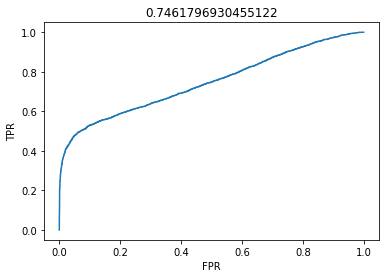

ZeroDivisionError: ignored

In [ ]:
print(len(set([E[x] for x in train_index]).intersection([E[x] for x in test_index]))) 

0


In [ ]:
C = list(Epairs[:,1]) #compound id of examples

In [ ]:
print(len(set([C[x] for x in train_index]).intersection([C[x] for x in test_index]))) 

413


In [ ]:
gp = gc = None
skf = KFold(n_splits=5,shuffle=True)
skf = StratifiedKFold(n_splits=5,shuffle=True)        
F=[list(test_index) for (train_index, test_index) in skf.split(P, Y)] 
F = NRKFold(E,pc,K=5,shuffle=True) 
Z = []; Yo = []; A = []
# for train_index, test_index in tqdm(skf.split(P, Y)):
for f in tqdm(range(len(F))):
    train_index = list(itertools.chain.from_iterable(F[:f]+F[f+1:]))
    test_index = F[f]
    #show number of proteins shared between train and test
    print(len(set([E[x] for x in train_index]).intersection([E[x] for x in test_index]))) 
    #show number of Compunds shared between train and test    
    print(len(set([C[x] for x in train_index]).intersection([C[x] for x in test_index])))   
    overlap=np.array([Cseq[x] for x in train_index for x in test_index])   #+np.array([c in Cttseq for c in Ctrseq])
    print("overlap =",overlap )
    print("Before",len( train_index))
    train_index=np.array( train_index)
    # overlap is true if a training example overlaps with test
    train_index= train_index[overlap==False]
    print("After=",len( train_index)) 
    y_train, y_test = Y[train_index], Y[test_index] 
    Ptr,Ctr = P[train_index,:],C[train_index,:]
    Pscaler = StandardScaler().fit(Ptr)
    Cscaler = StandardScaler().fit(Ctr)
    Ptr,Ctr = Pscaler.transform(Ptr), Cscaler.transform(Ctr)
    
    Kp = kernel(Ptr)
    Kc = kernel(Ctr)
    Ktr = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    clf = SVC(C = 1.0, kernel = 'precomputed',class_weight='balanced')
    clf.fit(Ktr,y_train)
    
    Ptt,Ctt = P[test_index,:],C[test_index,:]
    Ptt,Ctt = Pscaler.transform(Ptt), Cscaler.transform(Ctt)
    
    Kp = kernel(Ptt,Ptr)
    Kc = kernel(Ctt,Ctr)
    Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    z = clf.decision_function(Ktt)
    auc = roc_auc_score(y_test, z)
    A.append(auc);Z.extend(list(z));Yo.extend(list(y_test))

print('Average AUC',np.mean(A))
fpr, tpr, thresholds = roc_curve(Yo, Z)  
auc = roc_auc_score(Yo, Z)
plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()

NameError: ignored

In [ ]:
Ctrseq=np.array([Cseq[x] for x in train_index ])

NameError: ignored

In [ ]:
overlap[0]

1939

In [ ]:
list (set([E[x] for x in train_index]).intersection([E[x] for x in test_index]))

[]

In [ ]:
overlap=np.array(list (set([C[x] for x in train_index]).intersection([C[x] for x in test_index]))   )

In [ ]:
C

[2013,
 1350,
 1861,
 1235,
 2379,
 1656,
 1908,
 2033,
 162,
 1187,
 1578,
 389,
 1162,
 1939,
 1656,
 932,
 1073,
 284,
 1619,
 1232,
 839,
 461,
 2013,
 511,
 1659,
 421,
 1656,
 1605,
 2166,
 1756,
 2035,
 1656,
 889,
 1350,
 991,
 1656,
 1580,
 1656,
 1370,
 2008,
 614,
 812,
 261,
 791,
 2314,
 1656,
 566,
 1410,
 24,
 1488,
 1656,
 1076,
 1323,
 849,
 217,
 1595,
 1932,
 2252,
 1595,
 818,
 1595,
 264,
 2035,
 914,
 2070,
 2163,
 2092,
 1301,
 602,
 448,
 592,
 2050,
 930,
 92,
 576,
 404,
 1620,
 2377,
 1656,
 1136,
 1939,
 2095,
 367,
 342,
 2035,
 1840,
 1183,
 131,
 1656,
 1781,
 1209,
 1656,
 240,
 1842,
 1912,
 1656,
 2310,
 1183,
 98,
 2092,
 69,
 1350,
 288,
 858,
 1869,
 868,
 1607,
 961,
 470,
 277,
 2035,
 1656,
 330,
 1001,
 284,
 241,
 991,
 1756,
 2292,
 2277,
 1607,
 1939,
 1727,
 869,
 2390,
 1552,
 2356,
 1863,
 2096,
 972,
 1698,
 1656,
 921,
 2119,
 12,
 1128,
 1403,
 1015,
 1656,
 1036,
 448,
 2007,
 2225,
 2224,
 1552,
 892,
 1488,
 1641,
 1658,
 1488,
 863,

In [ ]:
Epairs

array([[ 894, 2013],
       [1191, 1350],
       [ 673, 1861],
       ...,
       [ 174,  711],
       [ 905,  596],
       [1055, 2329]])

In [ ]:
pip install strkernel

In [ ]:
!git clone https://github.com/jakob-he/string-kernel


Cloning into 'string-kernel'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 530 (delta 9), reused 16 (delta 7), pack-reused 512
Receiving objects: 100% (530/530), 9.65 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (271/271), done.


In [ ]:
CDhit_Data=open( path+'/new_CDhit_data.txt', 'w')
with open(path+'./New_Unique_data.txt') as f:#data_human_CPI.txt') as f:#../../celegans/original
    D = f.readlines()
    for d in tqdm(D):
        id,c,p,y = d.split()
        CDhit_Data.write(">"+id+'\n'+p+'\n')


100%|██████████| 4880/4880 [00:00<00:00, 163626.51it/s]


In [ ]:
import numpy as np
def Make_Cluster(path,file):
    names,Cluster=[],[]
    namescount,Clustercount=0,0
#    pdb.set_trace()
    with open(path+file) as f:
      content = f.readlines()
    for i in range(0,len(content),1):
        #print(content[i])
        if len(content[i].split('Cluster'))>1:
            cluster_name=content[i].split('Cluster')[1]
            #print("names=",names)
            if len(names)>0:
                Clustercount=Clustercount+1
                namescount=namescount+len(names)
                Cluster.append(names)
#              Cluster=np.append(Cluster,names)
                names=[]
        elif  len(content[i].split( '*' ))>1:
            name=(content[i].split( '*' )[0].split('>')[1].split('.')[0])
            names.append(name)
        elif len(content[i].split('at'))>1:
            name=content[i].split('at')[0].split('>')[1].split('.')[0]
            names.append(name)
    print("Total sequence",namescount)
    print("Total Clusters",Clustercount)
    return Cluster
def chunkify(l, n):
    """
    Given a list of list of elements l, this function will create n folds with
    almost equal number of elements in each.
    """
    result = [[] for i in range(n)]
    sums   = [0]*n
    i = 0
    #print(len(result),result,"\n")#,i,e)
    for e in l:
        result[i].extend(e)
        result=np.array( result)
        sums[i] += len(e)
        i = sums.index(min(sums))
        #print(len(result),result)#,i,e)
        #1/0
    return result
def name2feature(bag,Dict):
    """
    bag is list of names that you require from given Names and crossponding features
    """
    fs=[]
    for b in bag:
        #print(b)
        if b in Dict:
            #print("found=",b)
            #print(fs)#,Dict[b])
            fs.append(Dict[b])
        else:
          print("b=",b)
    return fs
C=Make_Cluster('/content/drive/MyDrive/CPI_Data/','SVM_90p_clstr_sorted.sorted')
#percentage='40'
#C=Make_Cluster('/content/drive/MyDrive/CPI_Data/','new_40p_clstr_sorted.sorted')
print(C)
CC=chunkify(C, 5)
print(len(CC),CC)
CC
IDs=np.array(IDs)
#print(IDs_dict[IDs[0]])
print("first fold",len(CC[0]),CC[0][0],IDs[0])
Notfound=[]
for i in CC[0]:
  if i not in IDs:
    Notfound.append(i)
print("Notfound=",len(Notfound),Notfound)
#1/0
print(len(CC[0]),len(CC[1]),len(CC[2]),len(CC[3]),len(CC[4]))

Total sequence 4793
Total Clusters 1686
[['1360_479', '1297_479', '681_479', '1345_479', '1632_479', '2165_479', '1960_479', '69_479', '1655_479', '123_479', '1050_479', '898_479', '1821_479', '651_479', '1116_479', '87_479', '92_479', '294_479', '2084_479', '425_479', '453_479', '102_479', '31_479', '344_479', '1237_479', '1631_479', '2184_479', '1201_479', '1109_479', '1974_479', '1216_479', '1130_479', '2059_479', '1426_479', '993_479', '1770_479', '2056_479', '1695_479', '1560_479', '1929_479', '1902_479', '2447_479', '1663_479', '2248_479', '2055_479', '364_479', '2254_479', '835_479', '2209_479', '2252_479', '1112_479', '646_479', '407_479', '1518_479', '2284_479', '1679_479', '1082_479', '1097_479', '76_479', '1707_479', '2295_479', '2494_479', '2348_479', '1091_479', '619_479', '78_479', '1593_479', '44_479', '467_479', '1814_479', '1208_479', '15_479', '734_479', '1199_479', '1162_479', '710_479', '1990_479', '2334_479', '398_479', '1041_479', '1176_479', '2221_479', '1151_479

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 10 20:01:32 2021
@author: fayya
"""
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve
#rdkit.Avalon.pyAvalonTools.GetAvalonCountFP((object)mol[, (int)nBits=512[, (bool)isQuery=False[, (int)bitFlags=15761407]]])
from rdkit.Avalon import pyAvalonTools as pat
def getFP(s,r = 3,nBits = 512):        
    compound = Chem.MolFromSmiles(s.strip())
    fp = AllChem.GetMorganFingerprintAsBitVect(compound, r, nBits = nBits)
    #fp = pat.GetAvalonCountFP(compound,nBits=nBits)
    m = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, m)     
    return m
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smiles = 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O' 
m = Chem.MolFromSmiles(smiles)

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')


from Bio import SeqIO
from Bio.SeqIO import FastaIO
from itertools import product
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import math
def twomerFromSeq(s):
    k=2
    groups={'A':'1','V':'1','G':'1','I':'2','L':'2','F':'2','P':'2','Y':'3',
            'M':'3','T':'3','S':'3','H':'4','N':'4','Q':'4','W':'4',
            'R':'5','K':'5','D':'6','E':'6','C':'7'}
    crossproduct=[''.join (i) for i in product("1234567",repeat=k)]
    for i in range (0,len(crossproduct)): crossproduct[i]=int(crossproduct[i])
    ind=[]
    for i in range (0,len(crossproduct)): ind.append(i)
    combinations=dict(zip(crossproduct,ind))

    V=np.zeros(int((math.pow(7,k))))      #defines a vector of 343 length with zero entries
    try:
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                c+=groups[kmer[l]]
                V[combinations[int(c)]]+=1
    except:
        count={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0}
        for q in range(0,len(s)):
            if s[q]=='A' or s[q]=='V' or s[q]=='G':
                count['1']+=1
            if s[q]=='I' or s[q]=='L'or s[q]=='F' or s[q]=='P':
                count['2']+=1
            if s[q]=='Y' or s[q]=='M'or s[q]=='T' or s[q]=='S':
                count['3']+=1
            if s[q]=='H' or s[q]=='N'or s[q]=='Q' or s[q]=='W':
                count['4']+=1
            if s[q]=='R' or s[q]=='K':
                count['5']+=1
            if s[q]=='D' or s[q]=='E':
                count['6']+=1
            if s[q]=='C':
                count['7']+=1
        val=list(count.values()  )           #[ 0,0,0,0,0,0,0]
        key=list(count.keys()     )           #['1', '2', '3', '4', '5', '6', '7']
        m=0
        ind=0
        for t in range(0,len(val)):     #find maximum value from val
            if m<val[t]:
                m=val[t]
                ind=t
        m=key [ind]                     # m=group number of maximum occuring group alphabets in protein
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                if kmer[l] not in groups:
                    c+=m
                else:
                    c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1

    V=V/(len(s)-1)
    return np.array(V)
def threemerFromSeq(s):
    k=3
    groups={'A':'1','V':'1','G':'1','I':'2','L':'2','F':'2','P':'2','Y':'3',
            'M':'3','T':'3','S':'3','H':'4','N':'4','Q':'4','W':'4',
            'R':'5','K':'5','D':'6','E':'6','C':'7'}
    crossproduct=[''.join (i) for i in product("1234567",repeat=k)]
    for i in range (0,len(crossproduct)): crossproduct[i]=int(crossproduct[i])
    ind=[]
    for i in range (0,len(crossproduct)): ind.append(i)
    combinations=dict(zip(crossproduct,ind))

    V=np.zeros(int((math.pow(7,k))))      #defines a vector of 343 length with zero entries
    try:
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                c+=groups[kmer[l]]
                V[combinations[int(c)]]+=1
    except:
        count={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0}
        for q in range(0,len(s)):
            if s[q]=='A' or s[q]=='V' or s[q]=='G':
                count['1']+=1
            if s[q]=='I' or s[q]=='L'or s[q]=='F' or s[q]=='P':
                count['2']+=1
            if s[q]=='Y' or s[q]=='M'or s[q]=='T' or s[q]=='S':
                count['3']+=1
            if s[q]=='H' or s[q]=='N'or s[q]=='Q' or s[q]=='W':
                count['4']+=1
            if s[q]=='R' or s[q]=='K':
                count['5']+=1
            if s[q]=='D' or s[q]=='E':
                count['6']+=1
            if s[q]=='C':
                count['7']+=1
        val=list(count.values())              #[ 0,0,0,0,0,0,0]
        key=list(count.keys() )              #['1', '2', '3', '4', '5', '6', '7']
        m=0
        ind=0
        for t in range(0,len(val)):     #find maximum value from val
            if m<val[t]:
                m=val[t]
                ind=t
        m=key [ind]                     # m=group number of maximum occuring group alphabets in protein
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                if kmer[l] not in groups:
                    c+=m
                else:
                    c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1

    V=V/(len(s)-1)
    return np.array(V)
def prot_feats_seq(seq):
    aa=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    f=[]
    X = ProteinAnalysis(str(seq))
    #X.molecular_weight() #throws an error if 'X' in sequence. we skip such sequences
    p=X.get_amino_acids_percent()
    dp=[]
    for a in aa:
        dp.append(p[a])
    dp=np.array(dp)
    dp=normalize(np.atleast_2d(dp), norm='l2', copy=True, axis=1, return_norm=False)
    f.extend(dp[0])
    tm=np.array(twomerFromSeq(str(seq)))
    tm=normalize(np.atleast_2d(tm), norm='l2', copy=True, axis=1,return_norm=False)
    f.extend(tm[0])
    thm=np.array(threemerFromSeq(str(seq)))
    thm=normalize(np.atleast_2d(thm), norm='l2', copy=True, axis=1,return_norm=False)
    f.extend(thm[0])
    return np.array(f)

import numpy as np
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics.pairwise import rbf_kernel as kernel #sigmoid_kernel,rbf_kernel,linear_kernel
from sklearn.model_selection import StratifiedKFold
import random
if __name__=='__main__':
    path='/content/drive/MyDrive/CPI_Data/'
    with open(path+'./New_Unique_data.txt') as f:#data_human_CPI.txt') as f:#../../celegans/original
        D = f.readlines()
    C=[];P=[];Y=[];Cseq=[];Pseq=[];IDs=[]
    for d in tqdm(D):
        id,c,p,y = d.split()

        try:
            xc = getFP(c)
            xp = prot_feats_seq(p)
        except Exception as e:
            print(e)
            continue
        Cseq.append(c)
        Pseq.append(p)
        C.append(xc)
        P.append(xp)
        IDs.append(id)
        Y.append(2*float(y)-1)
    Y = np.array(Y)
    C = np.array(C);
    P = np.array(P);
    IDs=np.array(IDs)
    
#%% Generating negative examples  
    regenerate = False
    if regenerate:
        Pset = list(set(Pseq)) #set of protein sequences
        pidx = list(range(len(Pset))) 
        Pdict = dict(zip(Pset, pidx)) #seq->index
        Cset = list(set(Cseq)) #set of compound sequences
        cidx = list(range(len(Cset)))#
        Cdict = dict(zip(Cset, cidx)) #str->index
        Epairs = np.array([(Pdict[p],Cdict[c]) for (p,c) in zip(Pseq,Cseq)]) #dict of pairs
        #IDs = np.array([(str (Pdict[p]))+'_'+str (Cdict[c])  for (p,c) in zip(Pseq,Cseq)]) #dict of pairs
        """
        CDhit_Data=open( path+'CDhit_data.txt', 'w')
        for d in range(len(IDs)):
          CDhit_Data.write(('>'+IDs[d]+'\n'+Pseq[d]+'\n'))
        """
        pos,negs = Epairs[Y==1,:],Epairs[Y!=1,:] 
        #if the negs are to be sampled such that the both the protein and compound occur in the positive set
        #pidx,cidx = list(set(pos[:,0])),list(set(pos[:,1])) 
        #pos, negs = list(map(tuple,pos.tolist())),list(map(tuple,negs.tolist())) #
        #below - remove 100% redundant positive and negative examples -- original redundant examples are not removed otherwise
        pos, negs = list(set(map(tuple,pos.tolist()))),list(set(map(tuple,negs.tolist())))
        NN = len(pos)#5*len(pos) For more negtive examples
        #negs = [] #comment to use the set of original negatives
        Lnegs = len(negs)
        while len(negs)<NN:
            possible = (random.choice(pidx),random.choice(cidx))#(pidx[np.random.randint(0,len(ppos))],cidx[np.random.randint(0,len(cpos))])
            if possible not in pos and possible not in negs:
                negs.append(possible)        
        print('Added Negatives',len(negs)-Lnegs)
        iPdict = {v: k for k, v in Pdict.items()}
        iCdict = {v: k for k, v in Cdict.items()}
        
        C=[];P=[];Y=[];Cseq=[];Pseq=[]
        for i,(p,c) in tqdm(enumerate(pos+negs)):
            p = iPdict[p]
            c = iCdict[c]
            try:
                xc = getFP(c)
                xp = prot_feats_seq(p)
            except Exception as e:
                print(e)
                continue
            Cseq.append(c)
            Pseq.append(p)
            C.append(xc)
            P.append(xp)
            Y.append(2*(i<len(pos))-1)
        
#%%
    Y = np.array(Y)
    C = np.array(C);
    P = np.array(P);
        
    

    
    # C = StandardScaler().fit_transform(C)
    # P = StandardScaler().fit_transform(P)
    gp = gc = None
    """
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    Z = []; Yo = []; A = []
    for train_index, test_index in tqdm(skf.split(P, Y)):
    """
    ####90% RR
    Z = []; Yo = []; A = []
    dataset_Dict=dict(zip(IDs,zip(C,P,Y)))
    Cseq_Dict=dict(zip(IDs, Cseq))
    Pseq_Dict=dict(zip(IDs,Pseq))
    testfold=0
    #Cttseq,Pttseq,Ctrseq,Ptrseq,Ctt,Ptt,Ctr, Ptr=[],[],[],[],[],[],[],[]
    AUC_ROC_final=[]
    Traincount=[]
    for folds in range(5):
      X_train,y_train,X_test,y_test=[],[],[],[]
      train_index,test_index=[],[]
      Cttseq,Pttseq,Ctrseq,Ptrseq,Ctt,Ptt,Ctr, Ptr=[],[],[],[],[],[],[],[]
      for foldno in range(5):
        """
        Fold=np.load(path+'/Fold'+str(foldno)+'_40p.npy')
        print("foldno=",foldno)
        #print(Fold)
        for example in Fold:
        """
        for example in CC[foldno]:
            if foldno==testfold:
              test_index.append(example)
              Cttseq.append(Cseq_Dict[example])
              Pttseq.append(Pseq_Dict[example])
              Ctt.append(dataset_Dict[example][0])
              Ptt.append(dataset_Dict[example][1])
              y_test.append(dataset_Dict[example][-1])
            else:
              train_index.append(example)
              Ctrseq.append(Cseq_Dict[example])
              Ptrseq.append(Pseq_Dict[example])
              """
              Ctr.append(dataset_Dict[example][0])
              Ptr.append(dataset_Dict[example][1])
              y_train.append(dataset_Dict[example][-1])
              """
      print("test len=",len(test_index),"X_train",len(train_index)) 
      testfold=testfold+1
      """
      #y_train, y_test = Y[train_index], Y[test_index] 
      Ptr,Ctr = P[train_index,:],C[train_index,:]
      Ptt,Ctt = P[test_index,:],C[test_index,:]
      ####
      Cseq=np.array(Cseq)
      Pseq=np.array(Pseq)
      Ptrseq,Ctrseq = Pseq[train_index],Cseq[train_index]
      Pttseq,Cttseq = Pseq[test_index],Cseq[test_index]
      """
      print(len(list(set(Ptrseq).intersection(set(Pttseq)))),
          len(list(set(Ctrseq).intersection(set(Cttseq)))))
      overlap = np.array([p in Pttseq for p in Ptrseq])#+np.array([c in Cttseq for c in Ctrseq])
      print("overlap =",overlap )
      print("Before",len( train_index))
      train_index=np.array( train_index)
      # overlap is true if a training example overlaps with test
      train_index= train_index[overlap==False]
      print("After=",len( train_index))
      ###again 
      
      Ctr=np.array([dataset_Dict[t][0] for t in train_index])
      Ptr=np.array([dataset_Dict[t][1] for t in train_index])
      y_train=np.array([dataset_Dict[t][-1] for t in train_index])
      #
      Traincount.append(len( train_index))
      Pscaler = StandardScaler().fit(Ptr)
      Cscaler = StandardScaler().fit(Ctr)
      Ptr,Ctr = Pscaler.transform(Ptr), Cscaler.transform(Ctr)
      Kp = kernel(Ptr)
      Kc = kernel(Ctr)
      Ktr = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
      
      clf = SVC(C = 100.0, kernel = 'precomputed',class_weight='balanced')
      clf.fit(Ktr,y_train)
      
      #Ptt,Ctt = P[test_index,:],C[test_index,:]
      Ptt,Ctt = Pscaler.transform(Ptt), Cscaler.transform(Ctt)
      
      Kp = kernel(Ptt,Ptr)
      Kc = kernel(Ctt,Ctr)
      Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
      
      z = clf.decision_function(Ktt)
      auc = roc_auc_score(y_test, z)
      print("auc",auc)
      A.append(auc);Z.extend(list(z));Yo.extend(list(y_test))
    print('Average AUC',np.mean(A),"Average training examples",np.mean(Traincount),"Test count",len(y_test))
    fpr, tpr, thresholds = roc_curve(Yo, Z)  
    auc = roc_auc_score(Yo, Z)
    plt.plot(fpr,tpr);plt.title(auc);plt.xlabel('FPR');plt.ylabel('TPR');plt.show()
#%% Training on all 
    
    # Ptr,Ctr = P,C
    # y_train = Y
    # Pscaler = StandardScaler().fit(Ptr)
    # Cscaler = StandardScaler().fit(Ctr)
    # Ptr,Ctr = Pscaler.transform(Ptr), Cscaler.transform(Ctr)
    
    # Kp = kernel(Ptr)
    # Kc = kernel(Ctr)
    # Ktr = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    # clf = SVC(C = 100.0, kernel = 'precomputed',class_weight='balanced')
    # clf.fit(Ktr,y_train)
    
#%% Testing 
    s = 'MSTPLDVRAAEYSPSFAVTMKKTVAAAPPKSPAPAKSKISVTRTGVNTTYPMPPPMPEKNYAPFFAEGCQTIAASKASMPPVQPASPLPPMHSAPPTASVVSNSIPPSSPATAPGERSPAVAARSVPTRFSPATVPRHHMNPNATEFMPGRRNGPDGGLEALPTSTADMELAKTPAGAAAAAVHAPSLPGAVRRSLQNSPIIQPSRLSVKSASEIEAISKNSALNAAAAAYVPQRTLARVVLTQPSPLALAPSEDPAKNNIEMMLDDLWCLFYLPTTLGENIKEEDYNPTLVFRVDSILTFWRVVNNIAAPSELQLSTLYLFRDGIDPKWEDPANRDGGIVKVKATAAQVDEAWELLLCRTIGDSWSPSVRETVNGVVLKVRERAYWLELWVTKNSSALQKDLAELWHPILGASFATTYLTHAMMQERSHAAAALAAEKQKKNRRRY'
    s = 'MNPNATEFMPGRRNGPDGGLEALPTSTADMELAKTPAGAAAAAVHAPSLPGAVRRSLQNSPIIQPSRLSVKSASEIEAISKNSALN'
    s = 'MAAAVQEAAAPVAHQPQMDKPMQIASIYVGDLDATINEPQLVELFKPFGTILNVRVCRDIITQRSLGYGYVNFDNHDSAEKAIESMNFKRVGDKCVRLMWQQRDPALRYSGNGNVFVKNLEKDVDSKSLHDIFTKFGSILSCKVMQDEEGKSRGYGFVHFKDETSAKDAIVKMNGAADHASEDKKALYVANFIRRNARLAALVANFTNVYIKQVLPTVNKDVIEKFFAKFGGITSAAACKDKSGRVFAFCNFEKHDDAVKAVEAMHDHHIDGITAPGEKLYVQRAQPRSERLIALRQKYMQHQALGNNLYVRNFDPEFTGADLLELFKEYGEVKSCRVMVSESGVSRGFGFVSFSNADEANAALREMNGRMLNGKPLIVNIAQRRDQRYTMLRLQFQQRLQMMMRQMHQPMPFVGSQGRPMRGRGGRQQLGGRAQGHPMPMPSPQQPQAPAQPQGFATPSAVGFVQATPKHSPGDVPETPPLPPITPQELESMSPQEQRAALGDRLFLKVYEIAPELAPKITGMFLEMKPKEAYELLNDQKRLEERVTEALCVLKAHQTA'
    s = 'LPPITPQELESMSPQEQRAALGDRLFLKVYEIAPELAPKITGMFLEMKPKEAYELLNDQKRLEERVTEALCVLKAHQTA'
    s = 'SWISSCHEESE'#'MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK'
    
    Cuseq = np.unique(Cseq)
    

    xp = prot_feats_seq(s)
    Ctt = np.array([getFP(c) for c in Cuseq])
    Ptt = np.array([xp]*len(Cuseq))
    
    Ptt,Ctt = Pscaler.transform(Ptt), Cscaler.transform(Ctt)
        
    Kp = kernel(Ptt,Ptr)
    Kc = kernel(Ctt,Ctr)
    Ktt = (Kp+Kc)**2# (Kp**2+Kc**2+2*Kp*Kc)
    
    z = clf.decision_function(Ktt)


    idx = np.argsort(-z)    
    print(Cuseq[idx[:3]])
    M = [Chem.MolFromSmiles(Cuseq[i]) for i in idx[:10]]
    # for i in idx[:10]:
    #     m = Chem.MolFromSmiles(Cuseq[i])
    #     SVG(moltosvg(m))

100%|██████████| 4880/4880 [00:27<00:00, 178.08it/s]


NameError: ignored

In [ ]:
Cseq

In [ ]:
Y[Y==-1]

NameError: ignored

In [ ]:
Cseq

NameError: ignored

In [ ]:
CC

array([list(['1360_479', '1297_479', '681_479', '1345_479', '1632_479', '2165_479', '1960_479', '69_479', '1655_479', '123_479', '1050_479', '898_479', '1821_479', '651_479', '1116_479', '87_479', '92_479', '294_479', '2084_479', '425_479', '453_479', '102_479', '31_479', '344_479', '1237_479', '1631_479', '2184_479', '1201_479', '1109_479', '1974_479', '1216_479', '1130_479', '2059_479', '1426_479', '993_479', '1770_479', '2056_479', '1695_479', '1560_479', '1929_479', '1902_479', '2447_479', '1663_479', '2248_479', '2055_479', '364_479', '2254_479', '835_479', '2209_479', '2252_479', '1112_479', '646_479', '407_479', '1518_479', '2284_479', '1679_479', '1082_479', '1097_479', '76_479', '1707_479', '2295_479', '2494_479', '2348_479', '1091_479', '619_479', '78_479', '1593_479', '44_479', '467_479', '1814_479', '1208_479', '15_479', '734_479', '1199_479', '1162_479', '710_479', '1990_479', '2334_479', '398_479', '1041_479', '1176_479', '2221_479', '1151_479', '430_479', '849_479', '206

In [ ]:
(set(Ptrseq).intersection(set(Pttseq)))

{'MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENEEASASIIVKMTDSFTEQADQVTAEVGKLLGEEKVDAILCVAGGWAGGNAKSKSLFKNCDLMWKQSIWTSTISSHLATKHLKEGGLLTLAGAKAALDGTPGMIGYGMAKGAVHQLCQSLAGKNSGMPPGAAAIAVLPVTLDTPMNRKSMPEADFSSWTPLEFLVETFHDWITGKNRPSSGSLIQVVTTEGRTELTPAYF',
 'MAAAAVARLWWRGILGASALTRGTGRPSVLLLPVRRESAGADTRPTVRPRNDVAHKQLSAFGEYVAEILPKYVQQVQVSCFNELEVCIHPDGVIPVLTFLRDHTNAQFKSLVDLTAVDVPTRQNRFEIVYNLLSLRFNSRIRVKTYTDELTPIESAVSVFKAANWYEREIWDMFGVFFANHPDLRRILTDYGFEGHPFRKDFPLSGYVELRYDDEVKRVVAEPVELAQEFRKFDLNSPWEAFPVYRQPPESLKLEAGDKKPDAK',
 'MAAAKVALTKRADPAELRTIFLKYASIEKNGEFFMSPNDFVTRYLNIFGESQPNPKTVELLSGVVDQTKDGLISFQEFVAFESVLCAPDALFMVAFQLFDKAGKGEVTFEDVKQVFGQTTIHQHIPFNWDSEFVQLHFGKERKRHLTYAEFTQFLLEIQLEHAKQAFVQRDNARTGRVTAIDFRDIMVTIRPHVLTPFVEECLVAAAGGTTSHQVSFSYFNGFNSLLNNMELIRKIYSTLAGTRKDVEVTKEEFVLAAQKFGQVTPMEVDILFQLADLYEPRGRMTLADIERIAPLEEGTLPFNLAEAQRQKASGDSARPVLLQVAESAYRFGLGSVAGAVGATAVYPIDLVKTRMQNQRSTGSFVGELMYKNSFDCFKKVLRYEGFFGLYRGLLPQLLGVAPEKAIKLTVNDFVRDKFMHKDGSVPLAAEILAGGCAGGSQVIFTNPLEIVKIRLQVAGEITTGPRVSALSVVRDLGFF

In [ ]:
print("After=",len( train_index))
Ctr=np.array([dataset_Dict[t][0] for t in train_index])
Ptr=np.array([dataset_Dict[t][1] for t in train_index])
y_train=np.array([dataset_Dict[t][-1] for t in train_index])
len(Ctr)

After= 2805


2805

In [ ]:
dataset_Dict[example][2]

-1

In [ ]:
####90% RR
dataset_Dict=dict(zip(IDs,zip(C,P,Y)))
testfold=0
AUC_ROC_final=[]
for folds in range(len(CC)):
  X_train,y_train,X_test,y_test=[],[],[],[]
  for foldno in range(len(CC)):
    print("foldno=",foldno)
    for example in CC[foldno]:
        if foldno==testfold:
          X_test.append(example)
          y_test.append(dataset_Dict[example][-1])
          1/0

foldno= 0


ZeroDivisionError: ignored

In [ ]:
dataset_Dict[train_index]

TypeError: ignored